<a href="https://colab.research.google.com/github/RomuloPaiva01/Kaggle-Titanic/blob/master/titanic_kaggle_top20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics

import numpy as np


df_test = pd.read_csv('test.csv')

df_train = pd.read_csv('train.csv')

#apenas exemplo de com deve ser a resposta final
df_gender_sub = pd.read_csv('gender_submission.csv')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Não temos todas as idades, nem todas as cabines, nem 2 se foram embarcados ou não.

Text(0.5, 1.0, 'Quantidade de pessoas que sobreviveram')

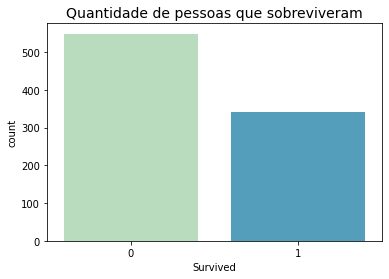

In [5]:
#quantas fraudes e quantas nao

sns.countplot('Survived', data=df_train, palette = 'GnBu')
plt.title('Quantidade de pessoas que sobreviveram', fontsize=14)

In [0]:

#vamos remover o nome das pessoas

df_train = df_train.loc[:, ~df_train.columns.isin(['Name', 'Ticket', 'Cabin'])]

df_train = pd.get_dummies(df_train)

df_train = df_train.loc[:, ~df_train.columns.isin(['Embarked_S', 'Sex_female'])]

df_train

X = df_train.loc[:, ~df_train.columns.isin(['Survived', 'PassengerId'])]

y = df_train['Survived']

In [7]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q
0,3,22.0,1,0,7.2500,1,0,0
1,1,38.0,1,0,71.2833,0,1,0
2,3,26.0,0,0,7.9250,0,0,0
3,1,35.0,1,0,53.1000,0,0,0
4,3,35.0,0,0,8.0500,1,0,0
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,0
887,1,19.0,0,0,30.0000,0,0,0
888,3,NaN,1,2,23.4500,0,0,0
889,1,26.0,0,0,30.0000,1,1,0


In [8]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [9]:
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
import numpy as np

#agora vamos transformar o df em algo otimizado para o xgboost
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, f1_score

data_dmatrix = xgb.DMatrix(data=X,label=y)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)
#esse random state éé bom

def objective(space):
    print(space)
    clf = xgb.XGBRegressor(n_estimators =1000,
                           n_fold = 5,
                           num_parallel_tree = 100,
                           colsample_bytree=space['colsample_bytree'],
                           learning_rate = space['learning_rate'],
                           max_depth = int(space['max_depth']),
                           min_child_weight = int(space['min_child_weight']),
                           subsample = space['subsample'],
                           gamma = space['gamma'],
                           reg_lambda = space['reg_lambda'],
                           reg_alpha = space['reg_alpha'],
                           scale_pos_weight = space['scale_pos_weight'],
                           objective = 'binary:logistic')

    eval_set  = [( X_train, y_train), ( X_test, y_test)]

    clf.fit(X_train, y_train,
            eval_set=eval_set,
            early_stopping_rounds=10,verbose=False)

    pred = clf.predict(X_test)

    for i in range(len(pred)):

      if pred[i] >= 0.5:

        pred[i] = 1

      else:

        pred[i] = 0

    #score = roc_auc_score(y_test, pred)
    #score = f1_score(y_test, pred)
    score = accuracy_score(y_test, pred)
    print ("SCORE:", score)
    return {'loss':1 - score, 'status': STATUS_OK }


space ={'max_depth': hp.uniform("x_max_depth", 1, 10),
        'min_child_weight': hp.uniform ('x_min_child', 1, 10),
        'subsample': hp.uniform ('x_subsample', 0.5, 1),
        'gamma' : hp.uniform ('x_gamma', 0.1, 1.0),
        'colsample_bytree' : hp.uniform ('x_colsample_bytree', 0.5 ,1),
        'reg_lambda' : hp.uniform ('x_reg_lambda',0,4),
        'reg_alpha' : hp.uniform('x_reg_alpha', 0, 4),
        'learning_rate' :hp.uniform('x_learning_rate', 0.01 , 0.2),
        'scale_pos_weight' :hp.uniform('x_scale_pos_weight', 0.1, 5)
    }


trials = Trials()

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=500,
            trials=trials)

print(best)



{'colsample_bytree': 0.5841592641720155, 'gamma': 0.19666751585002917, 'learning_rate': 0.04231565146316938, 'max_depth': 8.021102183621759, 'min_child_weight': 2.0085889038220435, 'reg_alpha': 2.9245222394580264, 'reg_lambda': 2.000651306942866, 'scale_pos_weight': 2.8855847150656544, 'subsample': 0.5039180449095624}
SCORE:
0.7488789237668162
{'colsample_bytree': 0.8401663176724588, 'gamma': 0.383648867935528, 'learning_rate': 0.14175173435488397, 'max_depth': 8.38432383852701, 'min_child_weight': 4.833768635575286, 'reg_alpha': 0.7622352227809999, 'reg_lambda': 0.8818817625216346, 'scale_pos_weight': 0.8596932418289522, 'subsample': 0.5200772327658462}
SCORE:
0.7847533632286996
{'colsample_bytree': 0.6109846795094172, 'gamma': 0.8228553655130533, 'learning_rate': 0.17110883161854498, 'max_depth': 9.691207562716945, 'min_child_weight': 8.538671128605799, 'reg_alpha': 1.6696032447952707, 'reg_lambda': 1.0736633362746018, 'scale_pos_weight': 1.0651874188145152, 'subsample': 0.6886427009

In [10]:
'''
#agora vamos transformar o df em algo otimizado para o xgboost
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score


data_dmatrix = xgb.DMatrix(data=X,label=y)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

xg_reg = xgb.XGBRegressor(objective ='binary:logistic', colsample_bytree = 0.5, learning_rate = 0.1,
                max_depth = 5, n_estimators = 200, subsamples = 0.8, nfold=10, gamma = 0.5, verbosity = 1, booster = 'gbtree',
                reg_lambda = 3 , reg_alpha = 3, scale_pos_weight = 1, num_parallel_tree = 200,
                max_delta_step = 1, min_child_weight = 1)


xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

for i in range(len(preds)):

  if preds[i] >= 0.5:

    preds[i] = 1

  else:

    preds[i] = 0

accuracy = accuracy_score(y_test, preds)


xgb.plot_importance(xg_reg)


plt.rcParams['figure.figsize'] = [5, 5]
plt.show()


conf_matrix = confusion_matrix(y_test, preds)

#tn, fp, fn, tp = conf_matrix.ravel()

tp = conf_matrix[0,0]
fp = conf_matrix[1,0]
tn = conf_matrix[1,1]
fn = conf_matrix[0,1]


print('Verdadeiros positivos = ', tp)
print('Verdadeiros negativos = ', tn)
print('Falsos positivos = ', fp)
print('Falsos negativos = ', fn)


plt.subplots(figsize=(8,8))
ax= plt.subplot()
sns.heatmap(conf_matrix, annot=True, ax = ax);

ax.set_xlabel('Predição');ax.set_ylabel('Label verdadeiro'); 
ax.set_title('Matriz de confusão modelo XGBOOST'); 
ax.xaxis.set_ticklabels(['Não sobreviveu', 'sobreviveu']); ax.yaxis.set_ticklabels(['Não sobreviveu', 'Sobreviveu']);


print("Acurácia: %.2f" % metrics.accuracy_score(y_test, preds))
print("Precisão: %.2f" % metrics.precision_score(y_test, preds))
print("Recall: %.2f" % metrics.recall_score(y_test, preds))
print("f1_score: %.2f" % metrics.f1_score(y_test, preds))
'''

'\n#agora vamos transformar o df em algo otimizado para o xgboost\nimport xgboost as xgb\nimport pandas as pd\nimport numpy as np\nfrom sklearn.metrics import accuracy_score\n\n\ndata_dmatrix = xgb.DMatrix(data=X,label=y)\n\nfrom sklearn.model_selection import train_test_split\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)\n\nxg_reg = xgb.XGBRegressor(objective =\'binary:logistic\', colsample_bytree = 0.5, learning_rate = 0.1,\n                max_depth = 5, n_estimators = 200, subsamples = 0.8, nfold=10, gamma = 0.5, verbosity = 1, booster = \'gbtree\',\n                reg_lambda = 3 , reg_alpha = 3, scale_pos_weight = 1, num_parallel_tree = 200,\n                max_delta_step = 1, min_child_weight = 1)\n\n\nxg_reg.fit(X_train,y_train)\n\npreds = xg_reg.predict(X_test)\n\nfor i in range(len(preds)):\n\n  if preds[i] >= 0.5:\n\n    preds[i] = 1\n\n  else:\n\n    preds[i] = 0\n\naccuracy = accuracy_score(y_test, preds)\n\n\nxgb.plot_import

In [0]:
df_test

#vamos remover o nome das pessoas

df_test = df_test.loc[:, ~df_test.columns.isin(['Name', 'Ticket', 'Cabin'])]

df_test = pd.get_dummies(df_test)

df_test = df_test.loc[:, ~df_test.columns.isin(['Embarked_S', 'Sex_female'])]

df_test

X = df_test.loc[:, ~df_test.columns.isin(['Survived', 'PassengerId'])]

In [12]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q
0,3,34.5,0,0,7.8292,1,0,1
1,3,47.0,1,0,7.0000,0,0,0
2,2,62.0,0,0,9.6875,1,0,1
3,3,27.0,0,0,8.6625,1,0,0
4,3,22.0,1,1,12.2875,0,0,0
...,...,...,...,...,...,...,...,...
413,3,NaN,0,0,8.0500,1,0,0
414,1,39.0,0,0,108.9000,0,1,0
415,3,38.5,0,0,7.2500,1,0,0
416,3,NaN,0,0,8.0500,1,0,0


In [13]:
'''
best['x_max_depth'] = int(best['x_max_depth'])

best['x_min_child'] = int(best['x_min_child'])
'''

best


{'x_colsample_bytree': 0.7546017232200846,
 'x_gamma': 0.12245024072746452,
 'x_learning_rate': 0.14906971963028548,
 'x_max_depth': 9.056988240082477,
 'x_min_child': 1.0376874021845792,
 'x_reg_alpha': 0.2807823627737983,
 'x_reg_lambda': 3.377857328039977,
 'x_scale_pos_weight': 1.431292721413194,
 'x_subsample': 0.7950472368209225}

In [14]:

xg_reg = xgb.XGBRegressor(n_estimators =100,
                          n_fold = 5,
                          num_parallel_tree = 100,
                          colsample_bytree=best['x_colsample_bytree'],
                          learning_rate = best['x_learning_rate'],
                          max_depth = int(best['x_max_depth']),
                          min_child_weight = int(best['x_min_child']),
                          subsample = best['x_subsample'],
                          gamma = best['x_gamma'],
                          reg_lambda = best['x_reg_lambda'],
                          reg_alpha = best['x_reg_alpha'],
                          scale_pos_weight = best['x_scale_pos_weight'],
                          objective = 'binary:logistic')


xg_reg.fit(X_train,y_train)

preds2 = xg_reg.predict(X)


for i in range(len(preds2)):

  if preds2[i] >= 0.5:

    preds2[i] = round(1)

  else:

    preds2[i] = round(0)


print(len(preds2))

418


In [15]:
df_gender_sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [16]:
preds2

preds2 = preds2.astype(np.int)

print(type(preds2[0]))

<class 'numpy.int64'>


In [17]:
df_gender_sub['Survived'] = preds2

df_gender_sub

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


Text(0.5, 1.0, 'Quantidade de pessoas que sobreviveram')

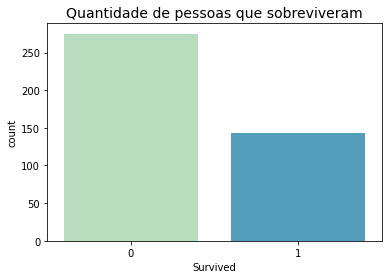

In [18]:
sns.countplot('Survived', data=df_gender_sub, palette = 'GnBu')
plt.title('Quantidade de pessoas que sobreviveram', fontsize=14)

In [0]:


file_name = 'answer.csv'

df_gender_sub.to_csv(file_name, index = False)

from google.colab import files

files.download("answer.csv")



In [0]:
#ensemble 

df1 = pd.read_csv('answer_078.csv')

df2 = pd.read_csv('answer_077.csv')

df3 = pd.read_csv('answer_074.csv')

df_ensemble = pd.DataFrame().reindex_like(df1)

df_ensemble['PassengerId'] = df1['PassengerId']

df_ensemble['Survived'] = df1['Survived'] + df2['Survived'] + df3['Survived']


for i in range(len(df_ensemble['Survived'])):

  if df_ensemble['Survived'].iloc[i] <= 1.5:

    df_ensemble['Survived'].iloc[i] = 0

  else:

     df_ensemble['Survived'].iloc[i] = 1



In [31]:
df_ensemble

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [0]:
file_name = 'answer.csv'

df_ensemble.to_csv(file_name, index = False)

from google.colab import files

files.download("answer.csv")